In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score

  # Load the dataset (replace with your dataset path)
  nrows = 10000
  data = pd.read_csv("/content/drive/MyDrive/Datasets/Reviews.csv", nrows = nrows)

  # Preprocessing
  data = data[['Score', 'Text']]
  data['Sentiment'] = data['Score'].apply(lambda score: 'positive' if score > 3 else 'negative')
  data = data.drop('Score', axis=1)

  # Create a smaller subset of the data (50%)
  small_data = data.sample(frac=0.1, random_state=42)

  # Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=0.2, random_state=42)

  # Convert text data into numerical features using TF-IDF
  vectorizer = TfidfVectorizer(stop_words='english')
  X_train_vectorized = vectorizer.fit_transform(X_train)
  X_test_vectorized = vectorizer.transform(X_test)

  # Create an SVM model
  model = SVC(kernel='linear')

  # Train the model on the training data
  model.fit(X_train_vectorized, y_train)

  # Make predictions on the testing data
  y_pred = model.predict(X_test_vectorized)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

Accuracy: 0.856


HW: visualization with full dataset.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-1-03983e3a3750>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Score'].apply(lambda score: 'positive' if score > 3 else 'negative')


Accuracy: 0.856

Classification Report:

              precision    recall  f1-score   support

    negative       0.79      0.56      0.66       492
    positive       0.87      0.95      0.91      1508

    accuracy                           0.86      2000
   macro avg       0.83      0.76      0.78      2000
weighted avg       0.85      0.86      0.85      2000



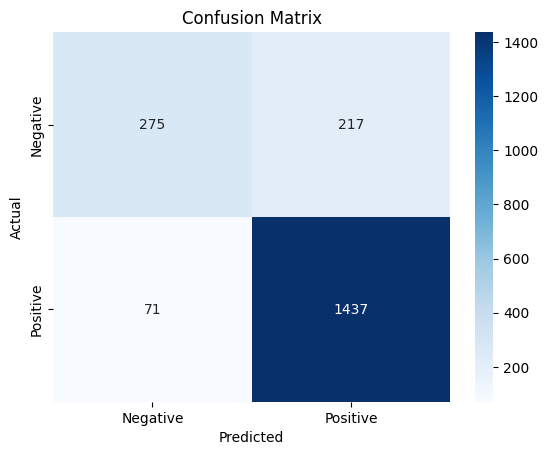

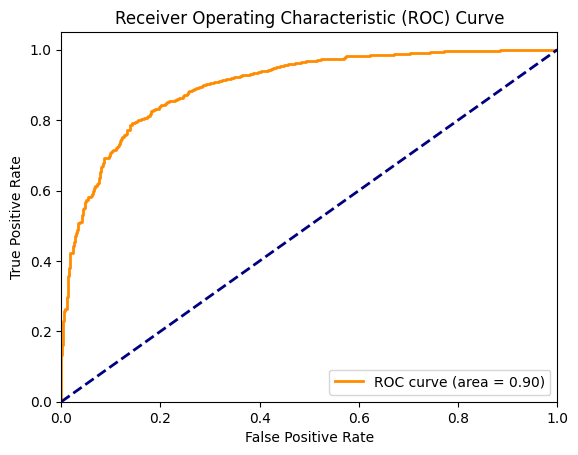

Review: My 18 year old son cannot tolerate gluten, so I have been on a quest to find a pancake/biscuit mix for him that he will actually like. I tried a few others and they were horrible. I felt so bad for my son and kept looking. Thank goodness I found Bisquick. It tastes most like real pancake mix and my son really enjoys it. I have made him biscuits too and he is thrilled to eat "bread" again.  I highly recommend this mix for anyone who simply cannot eat wheat.
Predicted Sentiment: positive

Review: I decided to try these based on the reviews - they are pretty good - especially for a more healthy option, but not sure I'll get them again.
Predicted Sentiment: positive

Review: These chips are salty with a hint of sweet. They are crisp and crunchy. They are the best chips I've ever had!
Predicted Sentiment: positive

Review: I have tried a few of the cocoa cups and find this product about average.  Unless you stir the cup the cocoa will taste watery for a few sips.
Predicted Sentiment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your dataset path)
nrows = 10000
data = pd.read_csv("/content/drive/MyDrive/Datasets/Reviews.csv", nrows=nrows)

# Preprocessing
data = data[['Score', 'Text']]
data['Sentiment'] = data['Score'].apply(lambda score: 'positive' if score > 3 else 'negative')
data = data.drop('Score', axis=1)

# Create a smaller subset of the data (10%)
small_data = data.sample(frac=0.1, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create an SVM model
model = SVC(kernel='linear', probability=True)

# Train the model on the training data
model.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_vectorized)
y_pred_proba = model.predict_proba(X_test_vectorized)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test.map({'negative': 0, 'positive': 1}), y_pred_proba)
roc_auc = roc_auc_score(y_test.map({'negative': 0, 'positive': 1}), y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Sample predictions
sample_reviews = X_test.sample(5, random_state=42)
sample_predictions = model.predict(vectorizer.transform(sample_reviews))
for review, prediction in zip(sample_reviews, sample_predictions):
    print(f"Review: {review}\nPredicted Sentiment: {prediction}\n")
